In [135]:
import pandas as pd
import plotly.express as px
import numpy as np

In [136]:
df = pd.read_csv('appl_preprocessed_open.csv')

In [137]:
df.index = df.date
df.index = pd.to_datetime(df.index)

In [138]:
df.head(3)

,date,open,day
date,,,
2018-06-06 00:00:00+00:00,2018-06-06 00:00:00+00:00,192.940833,Wednesday
2018-06-07 00:00:00+00:00,2018-06-07 00:00:00+00:00,193.369286,Thursday
2018-06-08 00:00:00+00:00,2018-06-08 00:00:00+00:00,191.268571,Friday


# Moving Average


1.   Simple Moving Average
2.   Weighted Moving Average
3.   Exponential Moving Average



In [139]:
df['open_ma_5'] = df['open'].rolling(window=5).mean()

In [140]:
weights = np.array([1,2,3,4,5])

In [141]:
df['open_wma_5'] = df['open'].rolling(window=5).apply(lambda x: np.dot(x, weights) / sum(weights))

In [142]:
df['open_ema'] = df['open'].ewm(span=5, adjust=False).mean()

In [143]:
df.head(3)

,date,open,day,open_ma_5,open_wma_5,open_ema
date,,,,,,
2018-06-06 00:00:00+00:00,2018-06-06 00:00:00+00:00,192.940833,Wednesday,NaN,NaN,192.940833
2018-06-07 00:00:00+00:00,2018-06-07 00:00:00+00:00,193.369286,Thursday,NaN,NaN,193.083651
2018-06-08 00:00:00+00:00,2018-06-08 00:00:00+00:00,191.268571,Friday,NaN,NaN,192.478624


**Considering the data after apple split the stocks.**

In [144]:
df1 = df['2020-09-01':]

In [145]:
df1 = df1.drop(columns=['date'])

<Axes: title={'center': 'Moving Averages'}, xlabel='date'>

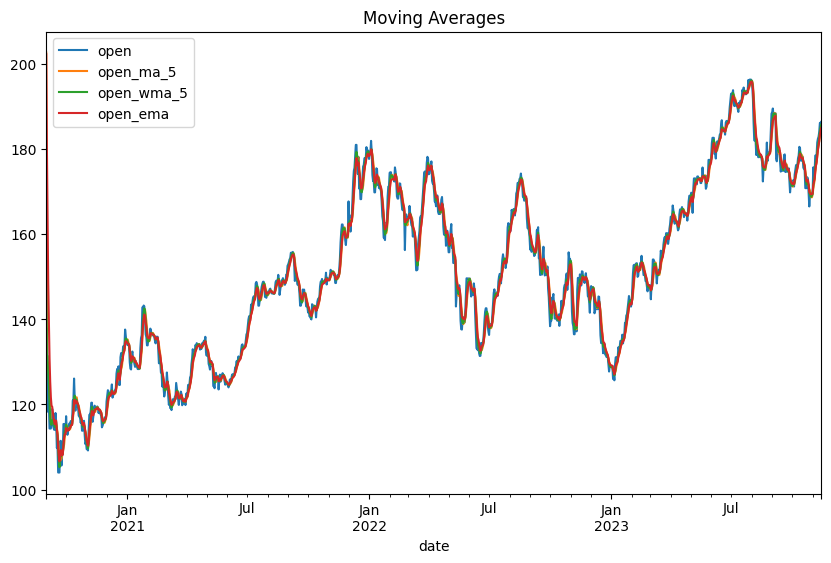

In [146]:
df1.plot(title="Moving Averages",figsize=(10,6))

In [147]:
fig = px.line(df1, x=df1.index, y=['open','open_ma_5','open_wma_5',	'open_ema'], title='Daily Average Open Values')

fig.update_xaxes(
    rangeslider_visible=True
    )
fig.show()


<Axes: title={'center': 'Comparison of Moving Averages'}, xlabel='date'>

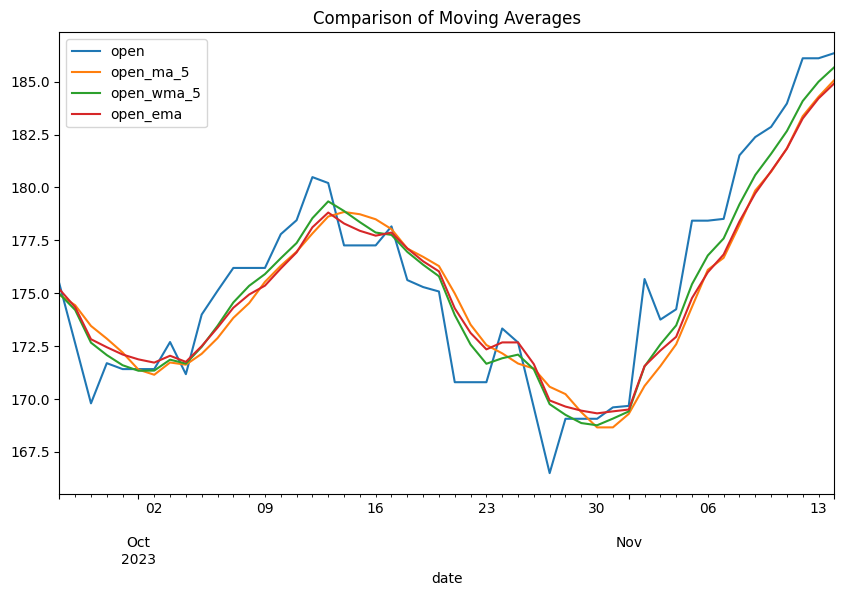

In [169]:
df[['open', 'open_ma_5', 'open_wma_5', 'open_ema']][-50:].plot(title='Comparison of Moving Averages',figsize=(10,6))

# Moving Averages on Hour wise data

In [148]:
df_hour = pd.read_csv('hourwise_data_preprocessed_appl.csv')

In [149]:
df_hour['open_ma_5'] = df_hour['open'].rolling(window=5).mean()

In [150]:
weights = np.array([1,2,3,4,5])

In [151]:
df_hour['open_wma_5'] = df_hour['open'].rolling(window=5).apply(lambda x: np.dot(x, weights) / sum(weights))

In [152]:
df_hour['open_ema'] = df_hour['open'].ewm(span=5, adjust=False).mean()

In [153]:
df_hour.index = df_hour['date']
df_hour.index = pd.to_datetime(df_hour.index)
df_hour = df_hour.drop(columns = ['date'])

In [154]:
df_hour.shape

(11923, 11)

In [155]:
df_hour.head(3)

,open,high,low,last,close,volume,symbol,exchange,open_ma_5,open_wma_5,open_ema
date,,,,,,,,,,,
2018-06-09 00:00:00+00:00,191.510,191.510,191.510,NaN,191.51,NaN,AAPL,IEXG,NaN,NaN,191.510000
2018-06-08 23:00:00+00:00,191.390,191.995,191.385,NaN,191.51,NaN,AAPL,IEXG,NaN,NaN,191.470000
2018-06-08 22:00:00+00:00,191.135,191.535,191.130,NaN,191.38,NaN,AAPL,IEXG,NaN,NaN,191.358333


In [156]:
df_hour = df_hour['2020-09-10':]

In [157]:
fig = px.line(df_hour, x=df_hour.index, y=['open','open_ma_5'], title='Comaprison with Moving Averages')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
    buttons=list([
            dict(count=1, label="1y", step="year", stepmode="todate"),
            dict(count=2, label="2y", step="year", stepmode="todate"),
            dict(step="all")
        ])
    ))
fig.show()


In [158]:
fig = px.line(df_hour, x=df_hour.index, y=['open','open_wma_5'],title='Comaprison with Moving Averages')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
    buttons=list([
            dict(count=1, label="1y", step="year", stepmode="todate"),
            dict(count=2, label="2y", step="year", stepmode="todate"),
            dict(step="all")
        ])
    ))
fig.show()

In [159]:
fig = px.line(df_hour, x=df_hour.index, y=['open','open_ema'], title='Comaprison with Moving Averages')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
    buttons=list([
            dict(count=1, label="1y", step="year", stepmode="todate"),
            dict(count=2, label="2y", step="year", stepmode="todate"),
            dict(step="all")
        ])
    ))
fig.show()

<Axes: title={'center': 'Comparison of Moving Averages'}, xlabel='date'>

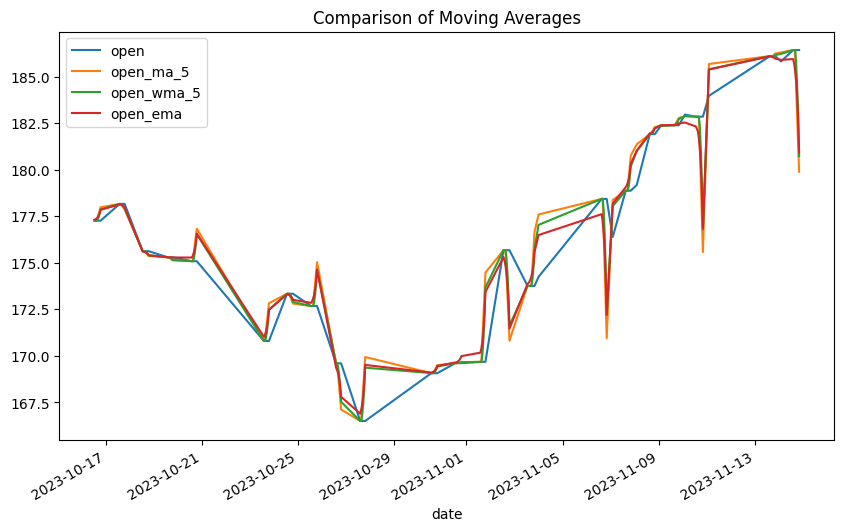

In [171]:
df_hour[['open', 'open_ma_5', 'open_wma_5', 'open_ema']][-150:].plot(title='Comparison of Moving Averages',figsize=(10,6))

In [164]:
df.columns

Index(['date', 'open', 'day', 'open_ma_5', 'open_wma_5', 'open_ema'], dtype='object')

**Calculating Mean Absolute Error**

In [175]:
abs(df_hour['open']-df_hour['open_ma_5']).mean()

0.8139685605095542

In [177]:
abs(df_hour['open']-df_hour['open_wma_5']).mean()

0.5621175541401287

In [176]:
abs(df_hour['open']-df_hour['open_ema']).mean()

0.692345763833267